Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.
C:\Users\venky\AppData\Local\Temp\ipykernel_15160\30283266.py:140: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: list(zip(g['position'], g['player'])))
C:\Users\venky\AppData\Local\Temp\ipykernel_15160\30283266.py:300: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cox_df.loc[cox_df["career_length"].eq(0), "career_length"] = 1e-6


DONE WITH printing names

Total teams that doubled down from 2000–2024: 115
Teams that double drafted DBs: 48
Percentage of double-drafting teams that did so at DB: 41.74%

Percentage breakdown of double-drafted grouped positions (2000–2024):
DB: 41.74%
DL: 26.09%
WR: 12.17%
OL: 10.43%
LB: 6.96%
TE: 1.74%
QB: 0.87%

CSV Files Processed: ['2000_draft.csv', '2001_draft.csv', '2002_draft.csv', '2003_draft.csv', '2004_draft.csv', '2005_draft.csv', '2006_draft.csv', '2007_draft.csv', '2008_draft.csv', '2009_draft.csv', '2010_draft.csv', '2011_draft.csv', '2012_draft.csv', '2013_draft.csv', '2014_draft.csv', '2015_draft.csv', '2016_draft.csv', '2017_draft.csv', '2018_draft.csv', '2019_draft.csv', '2020_draft.csv', '2021_draft.csv', '2022_draft.csv', '2023_draft.csv', '2024_draft.csv', 'av_nfl_2024.csv']

Any records missing season info:

Double Drafting Rate by Year (All Positions):
    season  teams_with_3_picks  double_drafting_teams  double_drafting_rate
0     2000                  31    

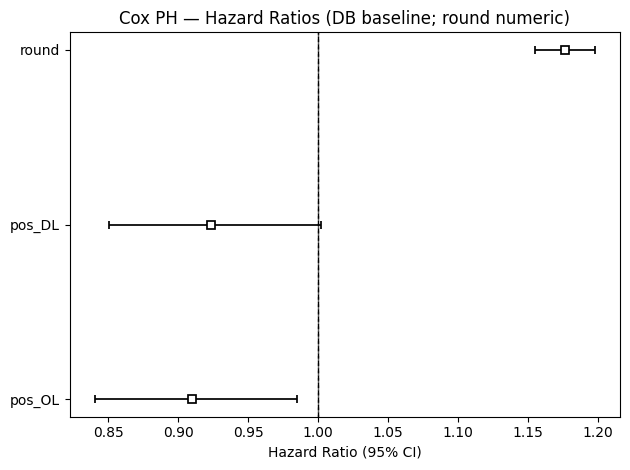

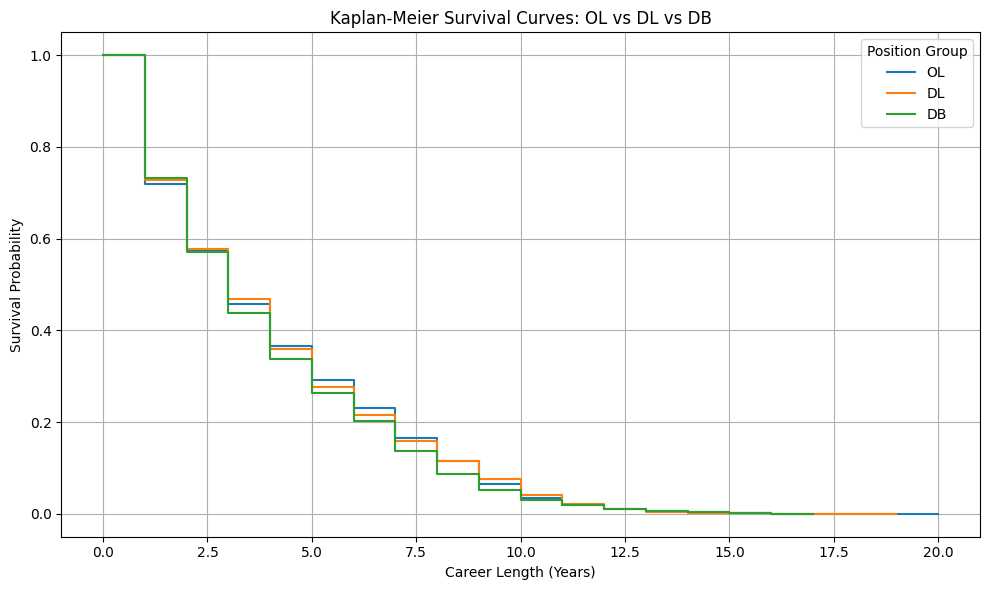


🔢 Number of Position Group Observations in First 3 Picks By Each Team (2000–2024):
position_group
DL    455
DB    440
OL    376
WR    292
LB    237
RB    175
QB    115
TE    104
SP      8
dtype: int64
Columns: ['game_id', 'pfr_game_id', 'season', 'game_type', 'week', 'player', 'pfr_player_id', 'position', 'team', 'opponent', 'offense_snaps', 'offense_pct', 'defense_snaps', 'defense_pct', 'st_snaps', 'st_pct']
           game_id   pfr_game_id  season game_type  week            player  \
0  2024_01_ARI_BUF  202409080buf    2024       REG     1     Spencer Brown   
1  2024_01_ARI_BUF  202409080buf    2024       REG     1  O'Cyrus Torrence   
2  2024_01_ARI_BUF  202409080buf    2024       REG     1      Dion Dawkins   
3  2024_01_ARI_BUF  202409080buf    2024       REG     1     David Edwards   
4  2024_01_ARI_BUF  202409080buf    2024       REG     1        Josh Allen   

  pfr_player_id position team opponent  offense_snaps  offense_pct  \
0      BrowSp00        T  BUF      ARI         

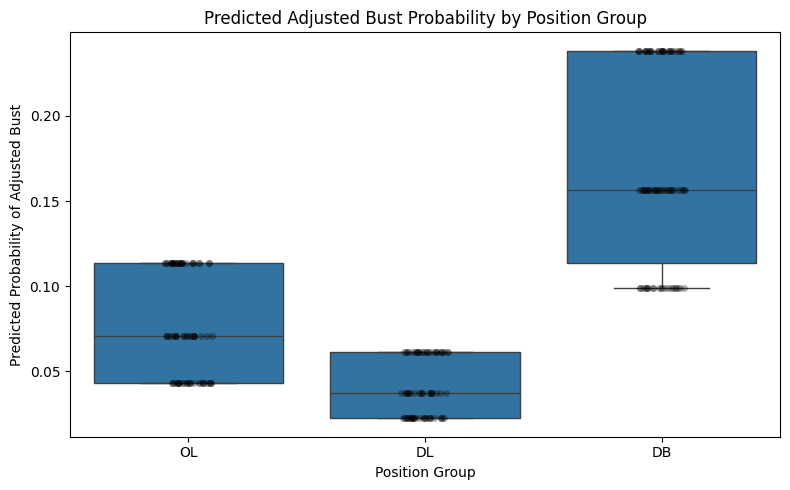

C:\Users\venky\AppData\Local\Temp\ipykernel_15160\30283266.py:1121: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X = X.groupby("draft_year", group_keys=False).apply(lambda d: per_year_rank(d, col))
C:\Users\venky\AppData\Local\Temp\ipykernel_15160\30283266.py:1121: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X = X.groupby("draft_year", group_keys=False).apply(lambda d: per_year_rank(d, col))



=== Over/Under/Aligned (View A) ===
✅ wrote overdraft_vs_underdraft_viewA.csv
    group  n_drafters  overdraft_rate  underdraft_rate  aligned_rate
0  double          57           0.632            0.333         0.035
1  single         296           0.476            0.497         0.027
✅ wrote need_vs_cap_proportional_results.csv
✅ wrote positional_strength_by_group.csv

=== Positional strength by group (medians) ===
          n  drafters  pdx4_prev_median  need_rank_median  \
grp                                                         
double   57        57            -0.152              14.0   
single  296       296             0.055              17.0   
zero    445         0             0.014              17.0   

        perf_rank_prev_median  need_pct_median  perf_pct_prev_median  
grp                                                                   
double                   19.0            0.581                 0.419  
single                   16.0            0.484               

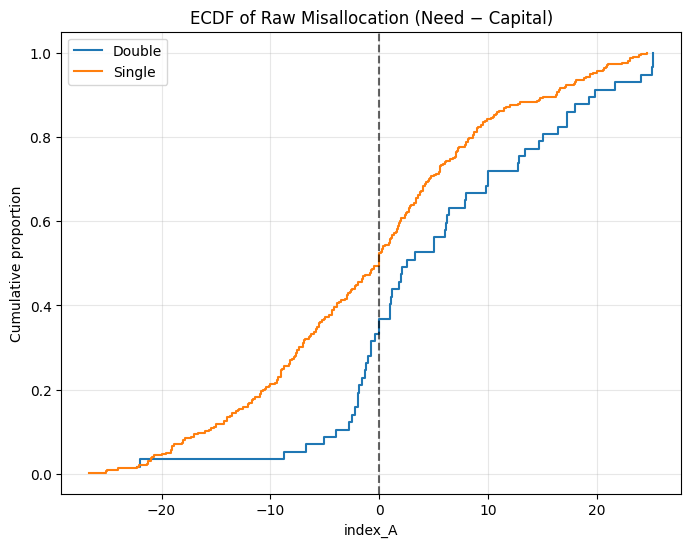

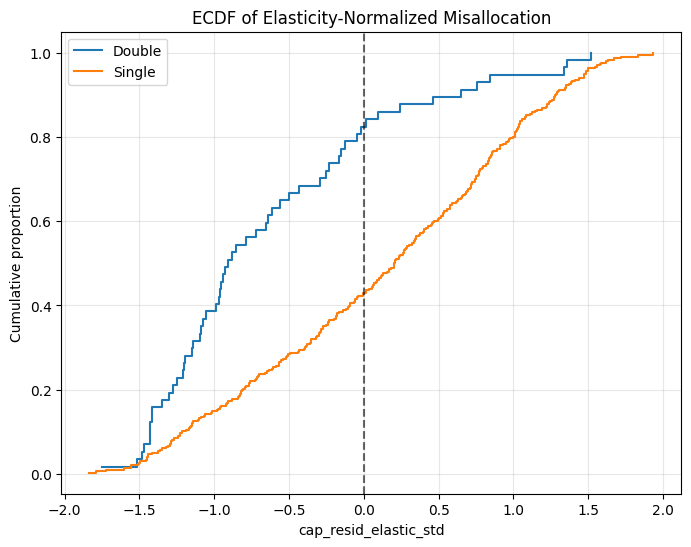

✅ wrote sfa_efficiency_team_year.csv
✅ wrote sfa_efficiency_group_summary.csv
        eff_mean  eff_median
grp                         
double     0.789       0.793
single     0.461       0.361
    draft_year  n_rows  n_teams  n_drafters  need_min  need_max  cap_pos_min  \
15        2016      32       32          17         1        32          0.0   
16        2017      32       32          20         1        32          0.0   
17        2018      32       32          16         1        32          0.0   
18        2019      32       32          17         1        32          0.0   
19        2020      32       32          17         1        32          0.0   
20        2021      32       32          16         1        32          0.0   
21        2022      32       32          13         1        32          0.0   
22        2023      32       32          13         1        32          0.0   
23        2024      32       32          13         1        32          0.0   
24    

ValueError: No objects to concatenate

In [1]:
import os
import re
import pandas as pd
from collections import defaultdict
from lifelines import CoxPHFitter
from lifelines import LogLogisticAFTFitter
import matplotlib.pyplot as plt
import rpy2.robjects as ro
from rpy2.robjects import conversion
from pathlib import Path


# ====== ROSTER DATA ANALYSIS: Career Lengths by Player ======

folder_path = "roster_data"
all_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

player_seasons = defaultdict(set)
player_positions = {}

for file in all_files:
    season = int(file.split("_")[1].split(".")[0])
    file_path = os.path.join(folder_path, file)

    try:
        df = pd.read_csv(file_path)

        if "full_name" not in df.columns or "position" not in df.columns:
            df = pd.read_csv(file_path, header=1)

        if "full_name" not in df.columns or "position" not in df.columns:
            print(f"⚠️ Skipping {file} — missing 'full_name' or 'position' columns.")
            continue
    except Exception as e:
        print(f"❌ Error reading {file}: {e}")
        continue

    for _, row in df.iterrows():
        name = row.get("full_name")
        position = row.get("position")

        if pd.notna(name):
            player_seasons[name].add(season)
            if name not in player_positions and pd.notna(position):
                player_positions[name] = position

# Calculate career lengths
career_lengths = []
for player, seasons in player_seasons.items():
    career_lengths.append({
        "full_name": player,
        "position": player_positions.get(player, "NAN"),
        "career_length": len(seasons)
    })

# Group position into broader categories
position_groups = {
    "OL": ["C", "G", "T", "OL"],
    "DL": ["DE", "DT", "NT", "DL"],
    "LB": ["OLB", "ILB", "MLB", "LB"],
    "DB": ["CB", "FS", "SS", "S", "DB"],
    "WR": ["WR"],
    "RB": ["RB", "FB"],
    "TE": ["TE"],
    "QB": ["QB"],
    "SP": ["K", "P", "LS", "KR", "PR", "SPEC"]
}

def map_position_group(pos):
    pos = str(pos).upper().strip()
    for group, codes in position_groups.items():
        if pos in codes:
            return group
    return "OTHER"

# Create DataFrame
career_df = pd.DataFrame(career_lengths)
career_df["position"] = career_df["position"].str.upper().str.strip()
career_df["position_group"] = career_df["position"].apply(map_position_group)

# Determine if player is still active (career < 25 years)
career_df["event_observed"] = (career_df["career_length"] < 25).astype(int)


folder_path = "anirudh_data"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

all_dfs = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Skip first row ONLY for known messy files like 2023 and 2024
    if file.startswith('2023') or file.startswith('2024'):
        df = pd.read_csv(file_path, skiprows=1)
    else:
        df = pd.read_csv(file_path)


    # FIX: Robust year extraction
    match = re.search(r'(\d{4})', file)
    if match:
        df['season'] = int(match.group(1))
    else:
        df['season'] = None

    all_dfs.append(df)

df_all = pd.concat(all_dfs, ignore_index=True)
df_all = df_all[df_all['season'].between(2000, 2024)]

# NOW rename columns correctly
df_all.rename(columns={
    'Rnd': 'round',
    'Pick': 'pick',
    'Tm': 'team',
    'Player': 'player',
    'Pos': 'position',
    'season': 'season'
}, inplace=True)

# Add the pick order per team per season
df_all['team_pick_number'] = df_all.groupby(['season', 'team']).cumcount() + 1

# Filter to first 3 picks
top3 = df_all[df_all['team_pick_number'] <= 3]

# Define doubling down function
def doubled_down(group):
    return group['position'].value_counts().max() >= 2

# Filter teams that doubled down
doublers = top3.groupby(['season', 'team']).filter(doubled_down)



# Summarize
summary = (
    doublers.groupby(['season', 'team'])
    .apply(lambda g: list(zip(g['position'], g['player'])))
    .reset_index(name='first_3_picks')
)
print("DONE WITH printing names")

# Step 1: Get only the positions drafted by teams who doubled down
double_positions = (
    doublers.groupby(['season', 'team'])['position']
    .apply(list)
    .reset_index(name='positions')
)

# Step 2: Define updated DB-related labels (including 'Safety', etc.)
db_labels = ['CB', 'S', 'FS', 'SS', 'DB', 'CB/S', 'CB-S', 'SAF', 'SAFETY', 'CORNERBACK', 'DEFENSIVE BACK']

def is_db(pos):
    return str(pos).strip().upper() in db_labels

def is_db_double_down(pos_list):
    db_count = sum(is_db(pos) for pos in pos_list)
    return db_count >= 2

# Step 3: Apply DB detection
double_positions['db_double_down'] = double_positions['positions'].apply(is_db_double_down)

# Step 4: Calculate percentage
total_doublers = len(double_positions)
db_doublers = double_positions['db_double_down'].sum()
percent_db_doublers = (db_doublers / total_doublers) * 100

print(f"\nTotal teams that doubled down from 2000–2024: {total_doublers}")
print(f"Teams that double drafted DBs: {db_doublers}")
print(f"Percentage of double-drafting teams that did so at DB: {percent_db_doublers:.2f}%")

# Step 5: Normalize position to grouped family labels
def group_position(pos):
    pos = str(pos).strip().upper()
    if pos in ['CB', 'S', 'FS', 'SS', 'DB', 'CB/S', 'CB-S', 'SAF', 'SAFETY', 'CORNERBACK', 'DEFENSIVE BACK']:
        return 'DB'
    elif pos in ['DE', 'DT', 'IDL', 'DL', 'NT']:
        return 'DL'
    elif pos in ['EDGE', 'OLB']:
        return 'DL'
    elif pos in ['ILB', 'LB']:
        return 'LB'
    elif pos in ['OT', 'OG', 'C', 'OL', 'T', 'G']:
        return 'OL'
    elif pos in ['WR']:
        return 'WR'
    elif pos in ['RB', 'HB', 'FB']:
        return 'RB'
    elif pos in ['QB']:
        return 'QB'
    elif pos in ['TE']:
        return 'TE'
    else:
        return pos  # fallback to original if unknown

# Apply group normalization to each list
double_positions['grouped_positions'] = double_positions['positions'].apply(
    lambda pos_list: [group_position(pos) for pos in pos_list]
)

# Get the most commonly doubled grouped position per team
def get_grouped_doubled_position(pos_list):
    vc = pd.Series(pos_list).value_counts()
    return vc[vc >= 2].index[0] if any(vc >= 2) else None

double_positions['doubled_group'] = double_positions['grouped_positions'].apply(get_grouped_doubled_position)


# Drop any rows without a doubled group
valid_grouped_doubles = double_positions.dropna(subset=['doubled_group'])

# Count frequencies of grouped doubled positions
group_counts = valid_grouped_doubles['doubled_group'].value_counts().sort_values(ascending=False)
group_percentages = (group_counts / group_counts.sum()) * 100

# Display full breakdown
pd.set_option('display.max_rows', None)
print("\nPercentage breakdown of double-drafted grouped positions (2000–2024):")
for group, pct in group_percentages.items():
    print(f"{group}: {pct:.2f}%")

# Debug print
print("\nCSV Files Processed:", csv_files)
print("\nAny records missing season info:")


# --- DOUBLE DRAFTING RATE OVER TIME (ALL POSITIONS) ---

# Get all teams with at least 3 picks per year
teams_with_3 = (
    top3.groupby(['season', 'team']).size().reset_index(name='count')
)
teams_with_3 = teams_with_3[teams_with_3['count'] == 3]

# Count how many teams doubled down each year
double_count_by_year = doublers.groupby('season')['team'].nunique().reset_index(name='double_drafting_teams')

# Merge total and double drafting counts
yearly_summary = teams_with_3.groupby('season')['team'].nunique().reset_index(name='teams_with_3_picks')
yearly_summary = yearly_summary.merge(double_count_by_year, on='season', how='left')
yearly_summary['double_drafting_teams'] = yearly_summary['double_drafting_teams'].fillna(0).astype(int)
yearly_summary['double_drafting_rate'] = (yearly_summary['double_drafting_teams'] / yearly_summary['teams_with_3_picks']) * 100

print("\nDouble Drafting Rate by Year (All Positions):")
print(yearly_summary)

# --- DOUBLE DRAFTING RATE OVER TIME (ONLY DBs) ---

# Merge original double_positions with team-season to get DB only
db_by_year = double_positions[['season', 'team', 'db_double_down']].copy()
db_by_year = db_by_year[db_by_year['db_double_down']]

# Count DB double-draft teams per year
db_doubles = db_by_year.groupby('season')['team'].nunique().reset_index(name='db_double_drafting_teams')

# Merge with base summary
yearly_summary = yearly_summary.merge(db_doubles, on='season', how='left')
yearly_summary['db_double_drafting_teams'] = yearly_summary['db_double_drafting_teams'].fillna(0).astype(int)
yearly_summary['db_double_drafting_rate'] = (yearly_summary['db_double_drafting_teams'] / yearly_summary['teams_with_3_picks']) * 100

print("\nDouble Drafting Rate by Year (DBs Only):")
print(yearly_summary[['season', 'db_double_drafting_teams', 'db_double_drafting_rate']])

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Define the folder path
print(career_df.head())
print(career_df['position_group'].value_counts())
#---------------------------------------------------------------------------------------------------------------
# ======================== OPTIMAL COX PH MODEL (All drafted OL/DL/DB) ========================
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# --- Merge career + draft info (earliest valid round per player) ---
career = career_df.copy()
drafts = df_all.copy()

career["full_name"] = career["full_name"].astype(str).str.upper().str.strip()
drafts["player"]    = drafts["player"].astype(str).str.upper().str.strip()

drafts["round_num"] = pd.to_numeric(drafts.get("round"), errors="coerce")
drafts_min = (
    drafts.loc[drafts["round_num"].between(1, 7, inclusive="both")]
          .sort_values(["player","round_num"])
          .drop_duplicates("player", keep="first")
          .loc[:, ["player","round_num"]]
          .rename(columns={"round_num":"round"})
)

cox_df = career.merge(drafts_min, left_on="full_name", right_on="player", how="inner")
cox_df = cox_df[cox_df["position_group"].isin(["OL","DL","DB"])].copy()

# --- Clean numeric columns ---
cox_df["career_length"]  = pd.to_numeric(cox_df["career_length"], errors="coerce")
cox_df["event_observed"] = (pd.to_numeric(cox_df["event_observed"], errors="coerce") > 0).astype(int)
cox_df["round"]          = pd.to_numeric(cox_df["round"], errors="coerce").clip(1,7).astype(int)

cox_df = cox_df.dropna(subset=["career_length","event_observed","round"]).copy()
cox_df.loc[cox_df["career_length"].eq(0), "career_length"] = 1e-6

# --- Design matrix (DB baseline) ---
cats = pd.Categorical(cox_df["position_group"], categories=["DB","OL","DL"])
pos_dummies = pd.get_dummies(cats, prefix="pos", drop_first=True)  # pos_OL, pos_DL

Xmat = pd.concat([
    cox_df[["career_length","event_observed","round"]].reset_index(drop=True),
    pos_dummies.reset_index(drop=True)
], axis=1)

for col in ["pos_OL","pos_DL"]:
    if col not in Xmat.columns:
        Xmat[col] = 0

# --- Fit optimal Cox model ---
cph = CoxPHFitter(penalizer=0.1)
cph.fit(Xmat, duration_col="career_length", event_col="event_observed", robust=True)

# --- Output ---
print("\n====== Optimal Cox PH (DB baseline; rounds 1–7; penalizer=0.1; robust=True) ======")
summary = (cph.summary.loc[:, ["coef","exp(coef)","se(coef)","z","p",
                               "exp(coef) lower 95%","exp(coef) upper 95%"]]
           .rename(columns={"exp(coef)":"HR",
                            "exp(coef) lower 95%":"HR_lower95",
                            "exp(coef) upper 95%":"HR_upper95"})
           .round(4))
print(summary)
print(f"Concordance index: {cph.concordance_index_:.3f}")

# --- Forest plot ---
ax = cph.plot(hazard_ratios=True)
ax.set_title("Cox PH — Hazard Ratios (DB baseline; round numeric)")
ax.axvline(1.0, linestyle="--", linewidth=1, color="black")
ax.set_xlabel("Hazard Ratio (95% CI)")
plt.tight_layout()
plt.show()

# --- 6) (Optional) PH diagnostics (commented to keep console clean) -------------
# cph.check_assumptions(X, p_value_threshold=0.05, show_plots=False)



from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Filter to only OL, DL, and DB players
km_df = career_df[career_df["position_group"].isin(["OL", "DL", "DB"])].copy()

# Initialize the Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each group and fit a survival curve
for group in ["OL", "DL", "DB"]:
    group_data = km_df[km_df["position_group"] == group]
    kmf.fit(durations=group_data["career_length"], event_observed=group_data["event_observed"], label=group)
    kmf.plot(ci_show=False)  # Disable confidence interval shading for cleaner look

# Customize plot
plt.title("Kaplan-Meier Survival Curves: OL vs DL vs DB")
plt.xlabel("Career Length (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Position Group")
plt.tight_layout()
plt.show()



# Map raw position to grouped labels (same as used earlier)
def map_position_group_for_draft(pos):
    pos = str(pos).strip().upper()
    if pos in ['CB', 'S', 'FS', 'SS', 'DB', 'CB/S', 'CB-S', 'SAF', 'SAFETY', 'CORNERBACK', 'DEFENSIVE BACK']:
        return 'DB'
    elif pos in ['DE', 'DT', 'IDL', 'DL', 'NT']:
        return 'DL'
    elif pos in ['EDGE', 'OLB']:
        return 'DL'
    elif pos in ['ILB', 'LB']:
        return 'LB'
    elif pos in ['OT', 'OG', 'C', 'OL', 'T', 'G']:
        return 'OL'
    elif pos == 'WR':
        return 'WR'
    elif pos in ['RB', 'HB', 'FB']:
        return 'RB'
    elif pos == 'QB':
        return 'QB'
    elif pos == 'TE':
        return 'TE'
    elif pos in ['K', 'P', 'LS', 'KR', 'PR', 'SPEC']:
        return 'SP'
    else:
        return 'OTHER'

# Apply to full draft dataset
df_all['position_group'] = df_all['position'].apply(map_position_group_for_draft)

# Filter to first 3 team picks (already exists as top3)
# Count position group observations in top 3 picks
position_counts = (
    top3.copy()
    .assign(position_group=lambda df: df['position'].apply(map_position_group_for_draft))
    .groupby('position_group')
    .size()
    .sort_values(ascending=False)
)

print("\n🔢 Number of Position Group Observations in First 3 Picks By Each Team (2000–2024):")
print(position_counts)

# If you want to load data for multiple seasons (2019–2024), you can loop through the seasons like this:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
from pathlib import Path

def load_snaps(season: int) -> pd.DataFrame:
    path = Path(f"snap_counts_{season}.csv")
    df = pd.read_csv(path, low_memory=False)  # files are UTF-8 now
    return df

# Example: load 2024 and sanity check
snaps_2024 = load_snaps(2024)
print("Columns:", snaps_2024.columns.tolist()[:20])
print(snaps_2024.head())

# Example: one player's per-game snaps
player_name = "Sauce Gardner"  # change as needed
p = snaps_2024[snaps_2024["player"] == player_name]
print(p[["game_id","week","team","position","offense_snaps","defense_snaps","st_snaps"]].sort_values("week").head())

#-----------------------------------------------------------------------------------------------------------------------

import pandas as pd
from pathlib import Path
import re

# -----------------------
# 1) Load draft classes 2019–2022
# -----------------------
def load_drafts_2019_2022(drafts_folder="anirudh_data"):
    years = [2019, 2020, 2021, 2022]
    dfs = []
    for y in years:
        # be robust to weird headers (some years had a top banner line)
        p = Path(drafts_folder) / f"{y}_draft.csv"
        try:
            df = pd.read_csv(p)
        except Exception:
            df = pd.read_csv(p, skiprows=1)

        # normalize columns
        df = df.rename(columns={
            "Rnd": "round",
            "Pick": "pick",
            "Tm": "team",
            "Player": "player",
            "Pos": "position",
        })
        df["season"] = y
        dfs.append(df[["season","round","pick","team","player","position"]])
    out = pd.concat(dfs, ignore_index=True)
    # uppercase & strip player names to merge with snaps
    out["player_key"] = out["player"].str.upper().str.replace(r"\s+", " ", regex=True).str.strip()
    return out

drafts = load_drafts_2019_2022()

# map draft positions to our 3 groups
def map_pos_group(pos):
    pos = str(pos).strip().upper()
    if pos in ["CB","S","FS","SS","DB","CB/S","CB-S","SAF","SAFETY","CORNERBACK","DEFENSIVE BACK"]:
        return "DB"
    if pos in ["DE","DT","NT","DL","IDL"]:
        return "DL"
    if pos in ["EDGE","OLB"]:  # if you want EDGE with DL instead, keep it DL; otherwise send to DL
        return "DL"
    if pos in ["OT","OG","C","OL","T","G"]:
        return "OL"
    return "OTHER"

drafts["pos_group"] = drafts["position"].apply(map_pos_group)
drafts = drafts[drafts["pos_group"].isin(["OL","DL","DB"])].copy()
drafts = drafts[drafts["round"] <= 3].copy()
# -----------------------
# 2) Load snap counts 2019–2024 (already exported UTF-8)
# -----------------------
def load_snaps(season: int) -> pd.DataFrame:
    df = pd.read_csv(f"snap_counts_{season}.csv", low_memory=False)
    # normalize key fields
    df["player_key"] = df["player"].str.upper().str.replace(r"\s+", " ", regex=True).str.strip()
    df["season"] = df["season"].astype(int)
    df["week"] = df["week"].astype(int)
    df["team"] = df["team"].astype(str).str.upper()
    df["position"] = df["position"].astype(str).str.upper()
    return df

snaps = pd.concat([load_snaps(y) for y in range(2019, 2025)], ignore_index=True)

# -----------------------
# 3) Compute team snap denominators per game (max snaps on that side for team-game)
#    (Prevents double-counting — “100% players” define the team total that game)
# -----------------------
team_off_denom = (
    snaps.groupby(["season","team","game_id"], as_index=False)["offense_snaps"]
         .max()
         .rename(columns={"offense_snaps":"team_offense_snaps"})
)
team_def_denom = (
    snaps.groupby(["season","team","game_id"], as_index=False)["defense_snaps"]
         .max()
         .rename(columns={"defense_snaps":"team_defense_snaps"})
)

snaps = snaps.merge(team_off_denom, on=["season","team","game_id"], how="left")
snaps = snaps.merge(team_def_denom, on=["season","team","game_id"], how="left")

# -----------------------
# 4) For each drafted player, compute 2-year snap share
#    Window = draft_year and draft_year+1
#    OL uses offense_snaps; DL/DB use defense_snaps
#    Share = sum(player_snaps)/sum(team_snaps) across the games the player recorded snaps
# -----------------------
# restrict snaps to relevant seasons (saves compute)
valid_seasons = set(drafts["season"]).union({s+1 for s in drafts["season"]})
snaps_subset = snaps[snaps["season"].isin(valid_seasons)].copy()

# merge drafts onto snaps by player_key
merged = snaps_subset.merge(
    drafts[["season","player_key","pos_group","round","pick","team"]]
          .rename(columns={"season":"draft_season", "team":"draft_team"}),
    on="player_key",
    how="right"  # keep all draftees; snap rows attach where available
)

# compute per-row usable snaps and team denominators depending on side of ball
def row_player_snaps(row):
    if row["pos_group"] == "OL":
        return row.get("offense_snaps", 0.0) or 0.0
    else:  # DL, DB
        return row.get("defense_snaps", 0.0) or 0.0

def row_team_snaps(row):
    if row["pos_group"] == "OL":
        return row.get("team_offense_snaps", 0.0) or 0.0
    else:
        return row.get("team_defense_snaps", 0.0) or 0.0

merged["player_snaps"] = merged.apply(row_player_snaps, axis=1)
merged["team_snaps"]   = merged.apply(row_team_snaps,   axis=1)

# keep only rows within the player’s 2-year window
merged = merged[(merged["season"] >= merged["draft_season"]) &
                (merged["season"] <= merged["draft_season"] + 1)]

# aggregate to player-level two-year window
two_year = (
    merged.groupby(["player_key","pos_group","draft_season","round","pick"], as_index=False)
          .agg(player_snaps_two_yr=("player_snaps","sum"),
               team_snaps_two_yr=("team_snaps","sum"),
               seasons_observed=("season","nunique"))
)

# compute share; avoid div-by-zero
two_year["snap_share_two_yr"] = two_year["player_snaps_two_yr"] / two_year["team_snaps_two_yr"].replace({0: pd.NA})
two_year["snap_share_two_yr"] = two_year["snap_share_two_yr"].fillna(0.0)

# bust if < 40%
two_year["bust"] = (two_year["snap_share_two_yr"] < 0.3).astype(int)

# -----------------------
# 5) Summary: counts & percentages for OL, DL, DB (drafts 2019–2022)
# -----------------------
summary_counts = (
    two_year.groupby("pos_group")["bust"]
            .agg(total="count", busts="sum")
            .reset_index()
)
summary_counts["bust_rate_pct"] = (summary_counts["busts"] / summary_counts["total"] * 100).round(2)
print("\n=== Busts over first 2 seasons (2019–2022 drafts) ===")
print(summary_counts.sort_values("bust_rate_pct", ascending=False))

# (Optional) also show by draft round within each group
by_round = (
    two_year.groupby(["pos_group","round"])["bust"]
            .agg(total="count", busts="sum")
            .reset_index()
)
by_round["bust_rate_pct"] = (by_round["busts"] / by_round["total"] * 100).round(2)
print("\n=== Bust rate by group & round ===")
print(by_round.sort_values(["pos_group","round"]))

# -----------------------
# 6) Sanity: how many drafted players had zero snap rows in 2-yr window?
# -----------------------
# join drafts (restricted to 2019–2022 and our 3 groups) to two_year to see who’s missing
draft_keys = drafts[["season","player","player_key","pos_group"]].rename(columns={"season":"draft_season"})
miss_join = draft_keys.merge(two_year[["player_key","draft_season"]], on=["player_key","draft_season"], how="left")
missing = miss_join[miss_join.isna().any(axis=1)]
print(f"\nUnmatched drafted players (no snaps found in 2-year window): {len(missing)}")
if len(missing) > 0:
    print(missing.head(10))


#######################################
###############################
############################
############################
##########################
#############################
import pandas as pd

SEASONS = [2019, 2020, 2021, 2022, 2023]

# offense vs defense bucket for position codes in your file
OFF_POS = {"QB","RB","FB","WR","TE","T","G","C","OL"}
DEF_POS = {"CB","S","FS","SS","DB","LB","ILB","OLB","EDGE","DE","DT","NT","DL"}

def load_snaps(season: int) -> pd.DataFrame:
    df = pd.read_csv(f"snap_counts_{season}.csv", low_memory=False)
    # normalize
    df["season"] = df["season"].astype(int)
    df["week"] = df["week"].astype(int)
    df["position"] = df["position"].astype(str).str.upper()
    df["team"] = df["team"].astype(str).str.upper()
    df["player_key"] = df["player"].str.upper().str.replace(r"\s+", " ", regex=True).str.strip()
    return df

# 1) Load 2022-2024
snaps = pd.concat([load_snaps(y) for y in SEASONS], ignore_index=True)

# 2) Team denominators (max snaps in team-game on that side of ball)
team_off_denom = (
    snaps.groupby(["season","team","game_id"], as_index=False)["offense_snaps"]
         .max().rename(columns={"offense_snaps":"team_offense_snaps"})
)
team_def_denom = (
    snaps.groupby(["season","team","game_id"], as_index=False)["defense_snaps"]
         .max().rename(columns={"defense_snaps":"team_defense_snaps"})
)

snaps = snaps.merge(team_off_denom, on=["season","team","game_id"], how="left")
snaps = snaps.merge(team_def_denom, on=["season","team","game_id"], how="left")

# 3) Compute per-row player snaps and team snaps based on side of ball inferred from position code
def side(player_pos: str) -> str:
    if player_pos in OFF_POS:
        return "OFF"
    if player_pos in DEF_POS:
        return "DEF"
    # if weird code: decide by which snaps are nonzero (fallback)
    return "OFF" if pd.notna else "DEF"

def row_player_snaps(row):
    pos = row["position"]
    if pos in OFF_POS:
        return row.get("offense_snaps", 0.0) or 0.0
    elif pos in DEF_POS:
        return row.get("defense_snaps", 0.0) or 0.0
    # fallback: take max of the two
    return max(row.get("offense_snaps", 0.0) or 0.0,
               row.get("defense_snaps", 0.0) or 0.0)

def row_team_snaps(row):
    pos = row["position"]
    if pos in OFF_POS:
        return row.get("team_offense_snaps", 0.0) or 0.0
    elif pos in DEF_POS:
        return row.get("team_defense_snaps", 0.0) or 0.0
    return max(row.get("team_offense_snaps", 0.0) or 0.0,
               row.get("team_defense_snaps", 0.0) or 0.0)

snaps["player_snaps_side"] = snaps.apply(row_player_snaps, axis=1)
snaps["team_snaps_side"]   = snaps.apply(row_team_snaps,   axis=1)

# 4) Aggregate to player-level (across 2022–2024) *within position code*
#    - total snaps (for ranking)
#    - snap share across all his games (sum player snaps / sum team snaps)
player_pos_agg = (
    snaps.groupby(["position","player_key","player"], as_index=False)
         .agg(total_player_snaps=("player_snaps_side","sum"),
              total_team_snaps=("team_snaps_side","sum"))
)

# Avoid div-by-zero; compute share
player_pos_agg["player_share"] = (
    player_pos_agg["total_player_snaps"] /
    player_pos_agg["total_team_snaps"].replace({0: pd.NA})
).fillna(0.0)

# 5) For each position code, take top-30 players by total snaps, average their share
def top30_avg_share_for_position(df_pos: pd.DataFrame) -> float:
    top = df_pos.sort_values("total_player_snaps", ascending=False).head(30)
    # average of players' multi-year share (not per-game)
    return float(top["player_share"].mean()) if len(top) > 0 else 0.0

results = []
for pos_code, g in player_pos_agg.groupby("position"):
    # only compute if we can infer side of ball (offense OR defense group membership or actual snaps present)
    if (pos_code in OFF_POS) or (pos_code in DEF_POS):
        avg_share = top30_avg_share_for_position(g)
        results.append({"position": pos_code, "avg_snap_share_top30": avg_share, "n_players": len(g)})
    else:
        # skip truly odd/special positions
        pass

pos_summary = pd.DataFrame(results).sort_values("avg_snap_share_top30", ascending=False)

# Present as percentages
pos_summary["avg_snap_share_top30_pct"] = (pos_summary["avg_snap_share_top30"] * 100).round(2)

print("\n=== Average snap % (2022–2024), top-30 by snaps for each position code ===")
print(pos_summary[["position","n_players","avg_snap_share_top30_pct"]])
#############
#############
############
# ---- Build position-specific thresholds from 2022–2024 top-30 usage ----
OFF_POS = {"QB","RB","FB","WR","TE","T","G","C","OL"}
DEF_POS = {"CB","S","FS","SS","DB","LB","ILB","OLB","EDGE","DE","DT","NT","DL"}

# Compute per-row player/team snaps on the correct side (if not present already)
def row_player_snaps_side(row):
    pos = str(row["position"]).upper()
    if pos in OFF_POS:
        return row.get("offense_snaps", 0.0) or 0.0
    elif pos in DEF_POS:
        return row.get("defense_snaps", 0.0) or 0.0
    return max(row.get("offense_snaps", 0.0) or 0.0,
               row.get("defense_snaps", 0.0) or 0.0)

def row_team_snaps_side(row):
    pos = str(row["position"]).upper()
    if pos in OFF_POS:
        return row.get("team_offense_snaps", 0.0) or 0.0
    elif pos in DEF_POS:
        return row.get("team_defense_snaps", 0.0) or 0.0
    return max(row.get("team_offense_snaps", 0.0) or 0.0,
               row.get("team_defense_snaps", 0.0) or 0.0)

snaps_top = snaps[snaps["season"].between(2019, 2023)].copy()
snaps_top["player_snaps_side"] = snaps_top.apply(row_player_snaps_side, axis=1)
snaps_top["team_snaps_side"]   = snaps_top.apply(row_team_snaps_side,   axis=1)

# Player-level totals per position across 2022–2024
player_pos_agg = (
    snaps_top.groupby(["position","player"], as_index=False)
             .agg(total_player_snaps=("player_snaps_side","sum"),
                  total_team_snaps=("team_snaps_side","sum"))
)
player_pos_agg["player_share"] = (
    player_pos_agg["total_player_snaps"] /
    player_pos_agg["total_team_snaps"].replace({0: pd.NA})
).fillna(0.0)

# For each position code, take top-30 by total snaps and average their share
pos_avg_share = (
    player_pos_agg.sort_values(["position","total_player_snaps"], ascending=[True, False])
                  .groupby("position")
                  .head(30)
                  .groupby("position")["player_share"]
                  .mean()
                  .to_dict()
)

# Position-specific thresholds: T_pos = 0.30 * avg_share_top30
T_GLOBAL = 0.30
pos_threshold = {pos: T_GLOBAL * avg for pos, avg in pos_avg_share.items()}

# ---- Determine each player's primary position code in the window (by snaps) ----
# Use the same "merged" dataframe you already have (filtered to the window)
# and the per-row "player_snaps" you computed earlier for the window.
pos_pref = (
    merged.groupby(["player_key","draft_season","position"], as_index=False)["player_snaps"]
          .sum()
          .sort_values(["player_key","draft_season","player_snaps"], ascending=[True,True,False])
          .drop_duplicates(subset=["player_key","draft_season"])
          .rename(columns={"position":"pos_code_main"})
          [["player_key","draft_season","pos_code_main"]]
)

# Merge primary pos into the window table (two_year or three_year)
two_year = two_year.merge(pos_pref, on=["player_key","draft_season"], how="left")

# Map threshold by primary pos; fallback to group average if pos code missing
# Build a simple group fallback by averaging thresholds of the codes that belong to each group
group_codes = {
    "DB": ["CB","FS","SS","S","DB"],
    "DL": ["DE","DT","NT","DL","EDGE","OLB","ILB","LB"],  # many teams label EDGE/LB variants
    "OL": ["T","G","C","OL"],
}
group_fallback = {}
for g, codes in group_codes.items():
    vals = [pos_threshold[c] for c in codes if c in pos_threshold]
    group_fallback[g] = sum(vals)/len(vals) if vals else T_GLOBAL*0.80  # safe-ish fallback

two_year["pos_thresh"] = two_year.apply(
    lambda r: pos_threshold.get(r.get("pos_code_main")) 
              if pd.notna(r.get("pos_code_main")) and r.get("pos_code_main") in pos_threshold
              else group_fallback.get(r["pos_group"], T_GLOBAL*0.80),
    axis=1
)

# ---- Position-adjusted bust decision ----
two_year["ABI_pos"]   = two_year["snap_share_two_yr"] / two_year["pos_thresh"]
two_year["bust_adj_pos"] = (two_year["ABI_pos"] < 1.0).astype(int)

# Summaries
adj_summary = (
    two_year.groupby("pos_group")["bust_adj_pos"]
            .agg(total="count", busts="sum")
            .reset_index()
)
adj_summary["bust_rate_adj_pct"] = (adj_summary["busts"]/adj_summary["total"]*100).round(2)

print("\n=== Position-adjusted busts (first 2 seasons; rounds 1–3) ===")
print(adj_summary.sort_values("bust_rate_adj_pct", ascending=False))

# Optional: by round
adj_by_round = (
    two_year.groupby(["pos_group","round"])["bust_adj_pos"]
            .agg(total="count", busts="sum")
            .reset_index()
)
adj_by_round["bust_rate_adj_pct"] = (adj_by_round["busts"]/adj_by_round["total"]*100).round(2)
print("\n=== Position-adjusted bust rate by group & round ===")
print(adj_by_round.sort_values(["pos_group","round"]))

#######
#
#
######
#####
#####
######
####
#
# ====== EXTENDED COX: add position-adjusted bust covariates ======
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# Build player_df if it's not already in memory
# Expects you already computed either `three_year` or `two_year`
# and that table contains: player_key, pos_group, round, bust_adj_pos
# (from the position-adjusted threshold logic we added).
# ------------------------------------------------------------
try:
    player_df
except NameError:
    if 'three_year' in globals():
        src = three_year.copy()
        share_col = 'snap_share_three_yr'
    elif 'two_year' in globals():
        src = two_year.copy()
        share_col = 'snap_share_two_yr'
    else:
        raise RuntimeError("Neither `three_year` nor `two_year` is defined. Run the bust-calculation step first.")

    # Minimal player-level dataset
    needed_cols = ["player_key", "pos_group", "round", "bust_adj_pos"]
    missing_cols = [c for c in needed_cols if c not in src.columns]
    if missing_cols:
        raise RuntimeError(f"Source table missing columns needed for modeling: {missing_cols}")

    player_df = src[needed_cols].drop_duplicates().copy()
    # Keep only OL/DL/DB and rounds 1-3
    player_df = player_df[player_df["pos_group"].isin(["OL","DL","DB"])]
    player_df = player_df[pd.to_numeric(player_df["round"], errors="coerce").notna()].copy()
    player_df["round"] = player_df["round"].astype(int)
    player_df = player_df[player_df["round"].between(1,3)]
    # rename to generic bust flag name expected by the model
    player_df = player_df.rename(columns={"bust_adj_pos": "bust_adj"})

# Safety: types for statsmodels
player_df["pos_group"] = player_df["pos_group"].astype("category")
player_df["bust_adj"]  = player_df["bust_adj"].astype(int)

# ------------------------------------------------------------
# Logistic regression: adjusted bust odds ~ position group + round
# ------------------------------------------------------------
logit_model = smf.logit("bust_adj ~ C(pos_group) + round", data=player_df).fit()
print(logit_model.summary())

# Odds ratios with 95% CI
params = logit_model.params
conf = logit_model.conf_int()
conf.columns = ["2.5%", "97.5%"]
conf["OR"] = params
or_table = pd.DataFrame({
    "OR":     np.exp(conf["OR"]),
    "2.5%":   np.exp(conf["2.5%"]),
    "97.5%":  np.exp(conf["97.5%"])
}).round(3)
print("\n=== Odds Ratios with 95% CI ===")
print(or_table)

# ------------------------------------------------------------
# Predicted probability plot by position group
# ------------------------------------------------------------
pred_df = player_df.copy()
pred_df["pred_prob"] = logit_model.predict(player_df)

plt.figure(figsize=(8, 5))
sns.boxplot(x="pos_group", y="pred_prob", data=pred_df, order=["OL","DL","DB"])
sns.stripplot(x="pos_group", y="pred_prob", data=pred_df, 
              order=["OL","DL","DB"], color="black", alpha=0.3, jitter=True)
plt.ylabel("Predicted Probability of Adjusted Bust")
plt.xlabel("Position Group")
plt.title("Predicted Adjusted Bust Probability by Position Group")
plt.tight_layout()
plt.show()
##################
#############
############
#################
############
###########
###########
############
import os, glob
import numpy as np
import pandas as pd

# ---- config ----
DRAFT_DIR  = "anirudh_data"
CS_PATH    = "Chase_Stuart_Draft_Value_Chart.csv"
PRE_POSCSV = "pre_draft_db_pos_rank.csv"   # expects: draft_year, team, pdx4_prev, rank_prev, pct_prev
YEAR_START, YEAR_END = 2000, 2024
DB_POS = {"CB","S","DB","FS","SS","NB","CB/S"}  # adjust if needed
# ----------------

# 1) Load pre-draft positional strength and build NEED rank:
#    perf_rank_prev: 1 = best defense (least need)
#    need_rank:      1 = WORST defense (MOST need), N = best (least need)
pre = pd.read_csv(PRE_POSCSV)
need_cols_required = {"draft_year","team","rank_prev"}
missing = need_cols_required - set(pre.columns)
if missing:
    raise RuntimeError(f"{PRE_POSCSV} missing columns: {missing}")

pre = pre.dropna(subset=["draft_year","team","rank_prev"]).copy()
pre["draft_year"] = pre["draft_year"].astype(int)
pre["perf_rank_prev"] = pre["rank_prev"].astype(int)
pre.drop(columns=["rank_prev"], inplace=True)

# teams per draft year (31 in 2001; 32 otherwise)
n_by_year = pre.groupby("draft_year")["team"].nunique().rename("n_teams").reset_index()
pre = pre.merge(n_by_year, on="draft_year", how="left")

# invert performance rank to "NEED" rank
pre["need_rank"] = pre["n_teams"].astype(int) - pre["perf_rank_prev"].astype(int) + 1

# keep pdx4 & pct if present, rename for clarity
if "pdx4_prev" not in pre.columns: pre["pdx4_prev"] = np.nan
if "pct_prev"  in pre.columns:
    pre.rename(columns={"pct_prev":"perf_pct_prev"}, inplace=True)
else:
    pre["perf_pct_prev"] = np.nan

# also create a "need percentile": 1 = most need, 0 = least need
# map need_rank in [1..N] to [1..0]: need_pct = (N - need_rank)/(N - 1) if N > 1 else 1
pre["need_pct"] = np.where(
    pre["n_teams"] > 1,
    (pre["n_teams"] - pre["need_rank"]) / (pre["n_teams"] - 1),
    1.0
)

# 2) Load Chase Stuart chart
cs = pd.read_csv(CS_PATH).rename(columns={"Pick":"overall","Draft_Value":"chase_value"})
cs["overall"] = pd.to_numeric(cs["overall"], errors="coerce")
cs = cs.dropna(subset=["overall","chase_value"]).copy()
cs["overall"] = cs["overall"].astype(int)
cs_min = float(cs["chase_value"].min())

# 3) Load drafts, keep top-3 picks, compute DB capital (top-3 only)
draft_frames = []
for path in sorted(glob.glob(os.path.join(DRAFT_DIR, "*_draft*.csv"))):
    base = os.path.basename(path)
    try:
        yr = int(base.split("_")[0])
    except ValueError:
        continue
    if not (YEAR_START <= yr <= YEAR_END):
        continue
    df = pd.read_csv(path)
    df = df.rename(columns={"Rnd":"round","Pick":"overall","Tm":"team_pfr","Player":"player","Pos":"position"})
    df["draft_year"] = yr
    draft_frames.append(df[["draft_year","round","overall","team_pfr","player","position"]])

if not draft_frames:
    raise RuntimeError("No draft files found in anirudh_data/ (e.g., 2000_draft.csv).")

draft = pd.concat(draft_frames, ignore_index=True)

# PFR -> fastR-ish codes (best effort)
pfr_to_fastR = {
    "GNB":"GB","KAN":"KC","KCR":"KC","NWE":"NE","TAM":"TB","SFO":"SF","NOR":"NO",
    "SDG":"SD","STL":"STL","LAR":"LA","LVR":"LV","JAX":"JAX","JAC":"JAX",
    "NYJ":"NYJ","NYG":"NYG","WAS":"WAS","WFT":"WAS","WSH":"WAS","OAK":"OAK","LV":"LV",
    "LA":"LA","LAC":"LAC","SD":"SD","ARI":"ARI","PHX":"ARI",
    "BAL":"BAL","BUF":"BUF","CAR":"CAR","CHI":"CHI","CIN":"CIN","CLE":"CLE","DAL":"DAL","DEN":"DEN","DET":"DET",
    "GB":"GB","HOU":"HOU","IND":"IND","MIA":"MIA","MIN":"MIN","NE":"NE","NO":"NO",
    "PHI":"PHI","PIT":"PIT","SEA":"SEA","SF":"SF","TB":"TB","TEN":"TEN"
}
draft["team"] = draft["team_pfr"].astype(str).str.upper().map(pfr_to_fastR).fillna(
    draft["team_pfr"].astype(str).str.upper()
)

# keep valid picks; get top-3 per team
draft["overall"] = pd.to_numeric(draft["overall"], errors="coerce")
draft = draft.dropna(subset=["overall"]).copy()
draft["overall"] = draft["overall"].astype(int)
draft = draft.sort_values(["draft_year","team","overall"])
draft["nth_pick_team"] = draft.groupby(["draft_year","team"]).cumcount() + 1
top3 = draft[draft["nth_pick_team"] <= 3].copy()

# attach Chase Stuart values; fill missing with chart minimum
top3 = top3.merge(cs, on="overall", how="left")
top3.loc[top3["chase_value"].isna(), "chase_value"] = cs_min

# DB flag
top3["pos_norm"] = top3["position"].astype(str).str.upper().str.replace(r"[^A-Z/]", "", regex=True)
top3["is_db"]    = top3["pos_norm"].isin(DB_POS).astype(int)

# aggregate to team×year (top-3 picks only)
agg = top3.groupby(["draft_year","team"]).agg(
    db_picks_top3      = ("is_db","sum"),
    db_capital_top3    = ("chase_value", lambda v: v[top3.loc[v.index,"is_db"].eq(1)].sum()),
    total_capital_top3 = ("chase_value","sum"),
).reset_index()

# 4) Merge need + capital; fill missing DB numbers as 0
X = pre.merge(agg, on=["draft_year","team"], how="left")
X["db_picks_top3"]      = X["db_picks_top3"].fillna(0).astype(int)
X["db_capital_top3"]    = X["db_capital_top3"].fillna(0.0)
X["total_capital_top3"] = X["total_capital_top3"].fillna(0.0)

# group labels
X["grp"] = np.select(
    [X["db_picks_top3"] >= 2, X["db_picks_top3"] == 1, X["db_picks_top3"] == 0],
    ["double","single","zero"],
    default="other"
)

# 5) Proportional capital rank among drafting teams ONLY, spread across observed NEED rank range
def proportional_spread(series_raw_rank, lo, hi):
    """
    Map raw integer ranks 1..k linearly to lo..hi (inclusive).
    Example: k=18, lo=4, hi=28 -> 1..18 -> 4..28.
    """
    raw = pd.Series(series_raw_rank, dtype="float64")
    k = int(raw.notna().sum())
    lo, hi = float(lo), float(hi)
    if k <= 1 or np.isclose(lo, hi):
        return pd.Series(np.full(len(raw), lo), index=raw.index)
    return lo + (raw - 1.0) * (hi - lo) / (k - 1.0)

rows = []
for year, sub in X.groupby("draft_year", group_keys=False):
    N = int(sub["n_teams"].iloc[0])

    drafters = sub[sub["db_picks_top3"] >= 1].copy()
    non_drafters = sub[sub["db_picks_top3"] == 0].copy()

    if drafters.empty:
        sub["cap_rank_raw"] = np.nan
        sub["cap_rank_prop_in_need_space"] = np.nan
        sub["need_rank_prop_in_cap_space"] = np.nan
        rows.append(sub)
        continue

    # raw capital ranks among drafters (1 = most DB capital)
    drafters["cap_rank_raw"] = drafters["db_capital_top3"].rank(method="min", ascending=False).astype(int)

    # observed NEED rank range among drafters (e.g., 4..28)
    lo_need = int(drafters["need_rank"].min())
    hi_need = int(drafters["need_rank"].max())

    # spread capital ranks across [lo_need..hi_need]
    drafters["cap_rank_prop_in_need_space"] = proportional_spread(drafters["cap_rank_raw"], lo_need, hi_need)

    # --- vice versa ---
    # raw NEED ranks among drafters → first rank within drafters by need (1 = most need)
    need_raw_within = drafters["need_rank"].rank(method="min", ascending=True).astype(int)
    k = int(drafters["cap_rank_raw"].max())  # number of drafters
    # spread the "need" ranks into [1..k] (capital rank space)
    drafters["need_rank_prop_in_cap_space"] = proportional_spread(need_raw_within, 1, k)

    # non-drafters: NaN in proportional ranks (excluded by design)
    non_drafters["cap_rank_raw"] = np.nan
    non_drafters["cap_rank_prop_in_need_space"] = np.nan
    non_drafters["need_rank_prop_in_cap_space"] = np.nan

    rows.append(pd.concat([drafters, non_drafters], ignore_index=True))

X = pd.concat(rows, ignore_index=True)

# 6) Misallocation indices (two symmetric views), defined ONLY for drafters
#    View A (capital into NEED space):  index_A = need_rank - cap_rank_prop_in_need_space
#    View B (need into CAPITAL space):  index_B = need_rank_prop_in_cap_space - cap_rank_raw
X["index_A"] = X["need_rank"] - X["cap_rank_prop_in_need_space"]
X["index_B"] = X["need_rank_prop_in_cap_space"] - X["cap_rank_raw"]
X["abs_index_A"] = X["index_A"].abs()
X["abs_index_B"] = X["index_B"].abs()

# 7) Per-year ranks of misallocation (among drafters only)
def per_year_rank(df, col):
    out = df.copy()
    mask = df["db_picks_top3"] >= 1
    out.loc[mask, f"{col}_rank_signed"] = df.loc[mask, col].rank(method="min", ascending=False)
    out.loc[mask, f"{col}_rank_abs"] = df.loc[mask, col].abs().rank(method="min", ascending=False)
    return out

for col in ["index_A", "index_B"]:
    X = X.groupby("draft_year", group_keys=False).apply(lambda d: per_year_rank(d, col))

# 8) Over/Under/Aligned counts for drafters (View A)
# 8) Over/Under/Aligned counts for drafters (View A)
def overdraft_summary(df, label):
    d = df[df["db_picks_top3"] >= 1]  # only teams that drafted ≥1 DB
    rows = []
    for grp, sub in d.groupby("grp"):
        vals = sub["index_A"].dropna()
        n = len(vals)
        if n == 0:
            continue
        over = int((vals > 0).sum())   # positive = OVER-spend vs need
        under = int((vals < 0).sum())  # negative = UNDER-spend
        equal = int((vals == 0).sum())
        rows.append({
            "group": grp,
            "n_drafters": n,
            "overdraft_rate": over/n,
            "underdraft_rate": under/n,
            "aligned_rate": equal/n
        })
    out = pd.DataFrame(rows)
    # order if both groups exist
    order = [g for g in ["double","single"] if g in out["group"].values]
    out = out.set_index("group").loc[order].reset_index()
    out.to_csv(f"overdraft_vs_underdraft_{label}.csv", index=False)
    print(f"✅ wrote overdraft_vs_underdraft_{label}.csv")
    return out

print("\n=== Over/Under/Aligned (View A) ===")
print(overdraft_summary(X, "viewA").round(3))


# 9) Write per-team/year results
cols_out = [
    "draft_year","team","n_teams","grp",
    "pdx4_prev","perf_rank_prev","perf_pct_prev",
    "need_rank","need_pct",
    "db_picks_top3","db_capital_top3","total_capital_top3",
    "cap_rank_raw","cap_rank_prop_in_need_space","need_rank_prop_in_cap_space",
    "index_A","abs_index_A","index_A_rank_signed","index_A_rank_abs",
    "index_B","abs_index_B","index_B_rank_signed","index_B_rank_abs"
]
X.sort_values(["draft_year","grp","team"]).to_csv("need_vs_cap_proportional_results.csv", index=False)
print("✅ wrote need_vs_cap_proportional_results.csv")

# 10) Positional strength snapshot by group (CLEAR need terms)
pos_strength = (
    X.groupby("grp")
     .agg(
         n=("team","count"),
         drafters=("db_picks_top3", lambda s: int((s>=1).sum())),
         pdx4_prev_median=("pdx4_prev","median"),
         need_rank_median=("need_rank","median"),
         perf_rank_prev_median=("perf_rank_prev","median"),
         need_pct_median=("need_pct","median"),
         perf_pct_prev_median=("perf_pct_prev","median"),
     )
     .reindex(["double","single","zero"])
)
pos_strength.to_csv("positional_strength_by_group.csv")
print("✅ wrote positional_strength_by_group.csv")
print("\n=== Positional strength by group (medians) ===")
print(pos_strength.round(3))

# 11) Misallocation summaries among drafters
def misalloc_summary(df, label):
    d = df[df["db_picks_top3"] >= 1]
    out = (
        d.groupby("grp")
         .agg(
             n=("team","count"),
             indexA_mean=("index_A","mean"),
             indexA_median=("index_A","median"),
             absA_mean=("abs_index_A","mean"),
             absA_median=("abs_index_A","median"),
             indexB_mean=("index_B","mean"),
             indexB_median=("index_B","median"),
             absB_mean=("abs_index_B","mean"),
             absB_median=("abs_index_B","median"),
         )
         .reindex(["double","single"])
    )
    out.to_csv(f"misallocation_{label}.csv")
    print(f"✅ wrote misallocation_{label}.csv")
    return out

print("\n=== Over/Under/Aligned (View A) ===")
print(overdraft_summary(X, "viewA").round(3))

print("\n=== Misallocation (View A: capital in NEED space) ===")
print(misalloc_summary(X, "viewA").round(3))

print("\n=== Misallocation (View B: NEED in capital space) ===")
print(misalloc_summary(X, "viewB").round(3))

# 12) Over-time trends (View A)
idx_time_A = (
    X[X["db_picks_top3"]>=1]
    .groupby(["draft_year","grp"])
    .agg(
        avg_index_A=("index_A","mean"),
        med_index_A=("index_A","median"),
        avg_abs_index_A=("abs_index_A","mean"),
        med_abs_index_A=("abs_index_A","median"),
        n=("index_A","count")
    )
    .reset_index()
)
idx_time_A_pivot = idx_time_A.pivot(index="draft_year", columns="grp")
idx_time_A_pivot.columns = [f"{c[0]}_{c[1]}" for c in idx_time_A_pivot.columns]
idx_time_A_pivot.reset_index().to_csv("need_vs_cap_viewA_over_time.csv", index=False)
print("✅ wrote need_vs_cap_viewA_over_time.csv")

#######
#######
##########
########
###########
#####
##########
##########
########
####
# ===================== ADD-ON: Elasticity-normalized misallocation =====================
# We use drafters only and fit, per year:
#   cap_rank_prop_in_need_space = alpha_y + beta_y * need_rank + error
# Then compute residuals: resid = actual_cap - predicted_cap
#   resid > 0  -> overspend vs year-specific responsiveness
#   resid < 0  -> underspend
# We also standardize residuals by the year's RMSE for comparability.

from math import sqrt

# 1) Fit per-year elasticity among drafters
elas_rows = []
pred_list = []

drafters_mask = X["db_picks_top3"] >= 1
for y, sub in X[drafters_mask].groupby("draft_year", group_keys=False):
    sub = sub.dropna(subset=["cap_rank_prop_in_need_space","need_rank"]).copy()
    n = len(sub)
    if n < 3 or sub["need_rank"].nunique() < 2:
        # not enough variation to fit a slope; fall back to trivial expectation
        alpha = float(sub["cap_rank_prop_in_need_space"].mean()) if n else np.nan
        beta  = 0.0
        r2    = np.nan
        rmse  = np.nan
        yhat  = np.full(n, alpha)
    else:
        # OLS via numpy.polyfit (degree=1): returns [beta, alpha]
        beta, alpha = np.polyfit(
            sub["need_rank"].astype(float).to_numpy(),
            sub["cap_rank_prop_in_need_space"].astype(float).to_numpy(),
            1
        )
        # Predictions, residuals, R^2, RMSE
        yhat = alpha + beta * sub["need_rank"].astype(float).to_numpy()
        resid = sub["cap_rank_prop_in_need_space"].astype(float).to_numpy() - yhat
        ss_res = float(np.sum(resid**2))
        ss_tot = float(np.sum((sub["cap_rank_prop_in_need_space"] - sub["cap_rank_prop_in_need_space"].mean())**2))
        r2 = 1.0 - ss_res/ss_tot if ss_tot > 0 else np.nan
        rmse = sqrt(ss_res / (n - 2)) if n > 2 else np.nan

    # store coefficients
    elas_rows.append({
        "draft_year": y,
        "alpha": alpha,
        "beta": beta,
        "n_drafters": n,
        "R2": r2,
        "RMSE": rmse
    })

    # stash predictions for this year to merge back
    if n:
        tmp = sub[["draft_year","team","grp","need_rank","cap_rank_prop_in_need_space"]].copy()
        tmp["cap_pred_elastic"] = yhat
        pred_list.append(tmp)

elasticity_by_year = pd.DataFrame(elas_rows).sort_values("draft_year")
elasticity_by_year.to_csv("elasticity_by_year.csv", index=False)
print("✅ wrote elasticity_by_year.csv")

# 2) Merge predictions back; compute residuals (+ standardized)
if pred_list:
    pred_all = pd.concat(pred_list, ignore_index=True)
    # join predictions to the master X (only drafters get predictions)
    X = X.merge(pred_all, on=["draft_year","team","grp","need_rank","cap_rank_prop_in_need_space"], how="left")
    # attach yearly RMSE for standardization
    X = X.merge(elasticity_by_year[["draft_year","RMSE"]], on="draft_year", how="left", suffixes=("",""))
    # residuals
    X["cap_resid_elastic"] = X["cap_rank_prop_in_need_space"] - X["cap_pred_elastic"]
    # standardized residual (z-like; RMSE as scale)
    X["cap_resid_elastic_std"] = X["cap_resid_elastic"] / X["RMSE"]

    # 3) Over/Under/Aligned classification using elasticity residuals
    def summarize_over_under(df):
        d = df[df["db_picks_top3"] >= 1].dropna(subset=["cap_resid_elastic"])
        rows = []
        for g, sub in d.groupby("grp"):
            n = len(sub)
            over  = int((sub["cap_resid_elastic"] > 0).sum())
            under = int((sub["cap_resid_elastic"] < 0).sum())
            align = int((sub["cap_resid_elastic"] == 0).sum())
            rows.append({
                "group": g,
                "n_drafters": n,
                "overdraft_rate_elastic": over/n if n>0 else np.nan,
                "underdraft_rate_elastic": under/n if n>0 else np.nan,
                "aligned_rate_elastic": align/n if n>0 else np.nan,
                "resid_mean": sub["cap_resid_elastic"].mean(),
                "resid_median": sub["cap_resid_elastic"].median(),
                "abs_resid_mean": sub["cap_resid_elastic"].abs().mean(),
                "abs_resid_median": sub["cap_resid_elastic"].abs().median(),
                "resid_std_mean": sub["cap_resid_elastic_std"].mean(),
                "resid_std_median": sub["cap_resid_elastic_std"].median(),
            })
        out = pd.DataFrame(rows)
        # consistent order if present
        order = [g for g in ["double","single"] if g in out["group"].values]
        out = out.set_index("group").loc[order].reset_index()
        return out

    elas_summary = summarize_over_under(X)
    elas_summary.to_csv("over_under_elasticity_summary.csv", index=False)
    print("✅ wrote over_under_elasticity_summary.csv")
    print(elas_summary.round(3))

    # 4) Save per-team/year elasticity-normalized results (drafters)
    cols_norm = [
        "draft_year","team","grp",
        "need_rank","cap_rank_prop_in_need_space",
        "cap_pred_elastic","cap_resid_elastic","cap_resid_elastic_std"
    ]
    X.loc[X["db_picks_top3"]>=1, cols_norm].sort_values(["draft_year","grp","team"]) \
      .to_csv("need_vs_cap_elasticity_normalized.csv", index=False)
    print("✅ wrote need_vs_cap_elasticity_normalized.csv")
else:
    print("No drafters with valid data to compute elasticity.")
# ================== END ADD-ON ==================

# 1) How strong is the league responsiveness by year?
print(pd.read_csv("elasticity_by_year.csv").round(3).head(10))

# 2) Compare mean residuals and rates using the elasticity lens
elas = pd.read_csv("over_under_elasticity_summary.csv").round(3)
print(elas)

# 3) Cross-tab signs to see distribution (drafters only)
d = X[X["db_picks_top3"]>=1].copy()
d["sign_elastic"] = np.sign(d["cap_resid_elastic"])
print(d.pivot_table(index="grp", columns="sign_elastic", values="team", aggfunc="count").fillna(0))

import matplotlib.pyplot as plt
import numpy as np

def plot_ecdf(df, value_col, group_col="grp", groups=("double","single"), title="ECDF of Misallocation"):
    plt.figure(figsize=(8,6))
    for g in groups:
        vals = df.loc[df[group_col]==g, value_col].dropna().sort_values().to_numpy()
        y = np.arange(1, len(vals)+1) / len(vals)
        plt.step(vals, y, where="post", label=g.capitalize())
    plt.axvline(0, color="k", linestyle="--", alpha=0.6)
    plt.xlabel(value_col)
    plt.ylabel("Cumulative proportion")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Example: raw misallocation ECDF
plot_ecdf(X, "index_A", title="ECDF of Raw Misallocation (Need − Capital)")

# Example: elasticity-normalized ECDF
plot_ecdf(X, "cap_resid_elastic_std", title="ECDF of Elasticity-Normalized Misallocation")


import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Work only with teams that drafted at least one DB
D = X[X["db_capital_top3"] > 0].copy()

# Log-transform variables
D["ln_cap"] = np.log(D["db_capital_top3"])
D["ln_need"] = np.log(D["need_rank"].clip(lower=1e-6))  # avoid log(0)

frontier_preds = []
efficiency_rows = []

for y, sub in D.groupby("draft_year"):
    if len(sub) < 6:  # need enough teams in the year to fit
        continue
    
    # Quantile regression at the 90th percentile ≈ efficient frontier
    model = smf.quantreg("ln_cap ~ ln_need", sub).fit(q=0.90)
    sub["pred_frontier90"] = model.predict(sub)
    
    # Gap to frontier = predicted frontier – actual log(cap)
    sub["gap_to_frontier"] = sub["pred_frontier90"] - sub["ln_cap"]
    
    # Efficiency score (bounded 0–1): higher = closer to efficient frontier
    sub["frontier_eff"] = np.exp(-sub["gap_to_frontier"])
    
    frontier_preds.append(sub)
    
    # Summaries by group (double/single) for this year
    for g, gsub in sub.groupby("grp"):
        efficiency_rows.append({
            "draft_year": y,
            "grp": g,
            "n": len(gsub),
            "eff_mean": gsub["frontier_eff"].mean(),
            "eff_median": gsub["frontier_eff"].median()
        })

# Save per-team efficiency
frontier_all = pd.concat(frontier_preds, ignore_index=True)
frontier_all.to_csv("sfa_efficiency_team_year.csv", index=False)
print("✅ wrote sfa_efficiency_team_year.csv")

# Save group-level summary
eff_summary = pd.DataFrame(efficiency_rows)
eff_summary.to_csv("sfa_efficiency_group_summary.csv", index=False)
print("✅ wrote sfa_efficiency_group_summary.csv")
print(eff_summary.groupby("grp")[["eff_mean","eff_median"]].mean().round(3))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# --------------------------
# Frontier Fit Plot (SFA style)
# --------------------------

def prepare_sfa_year(df_year: pd.DataFrame) -> pd.DataFrame:
    """Prepare one-year data: log-transform, fit OLS + 90% quantile frontier,
    compute predicted frontier, gap, and efficiency."""
    d = df_year.copy()
    d = d[(d["db_capital_top3"] > 0) & (d["need_rank"] > 0)].copy()

    # logs (need rank is positive by construction; clip just in case)
    d["ln_need"] = np.log(d["need_rank"].clip(lower=1e-6))
    d["ln_cap"]  = np.log(d["db_capital_top3"])

    # OLS (league-average line)
    ols = smf.ols("ln_cap ~ ln_need", data=d).fit()

    # Quantile frontier (90th percentile ≈ efficient frontier)
    # If your sample is small, you can drop to q=0.85; if large, try q=0.95
    qreg = smf.quantreg("ln_cap ~ ln_need", data=d).fit(q=0.90)

    # Predictions on observed ln_need for per-team efficiency
    d["pred_ols"]      = ols.predict(d)
    d["pred_frontier"] = qreg.predict(d)

    # Gap to frontier on log scale; efficiency = exp(-gap) \in (0,1]
    # If ln_cap >= pred_frontier → gap<=0 → efficiency >= 1; we cap at 1.0
    d["gap_to_frontier"] = d["pred_frontier"] - d["ln_cap"]
    d["frontier_eff"]    = np.exp(-d["gap_to_frontier"]).clip(upper=1.0)

    return d, ols, qreg


def plot_frontier_fit(df_year: pd.DataFrame, ols, qreg, year: int, save_path: str | None = None):
    """Scatter ln(Need) vs ln(Capital) with OLS (avg) and Quantile (frontier) lines."""
    d = df_year.copy()

    # grid for smooth lines
    xx = np.linspace(d["ln_need"].min(), d["ln_need"].max(), 200)
    yy_ols = ols.params["Intercept"] + ols.params["ln_need"] * xx
    yy_fr  = qreg.params["Intercept"] + qreg.params["ln_need"] * xx

    plt.figure(figsize=(8.5, 6.25))

    # scatter by group
    for g, c in [("double", "tab:blue"), ("single", "tab:orange")]:
        gg = d[d["grp"] == g]
        if not gg.empty:
            plt.scatter(gg["ln_need"], gg["ln_cap"], s=48, alpha=0.85, label=g.capitalize(), c=c, edgecolor="white", linewidth=0.5)

    # lines
    plt.plot(xx, yy_ols, "k--", lw=2, label="OLS (League Average)")
    plt.plot(xx, yy_fr,  "r-",  lw=2.25, label="Frontier (Quantile 90%)")

    # cosmetics
    plt.xlabel("ln(Need Rank)  (1 = highest need)")
    plt.ylabel("ln(DB Draft Capital)")
    plt.title(f"DB Capital vs Need — Frontier vs Average (Draft {year})")
    plt.legend(frameon=True)
    plt.grid(alpha=0.3)

    # annotate a few most/least efficient points (optional, top 3 each)
    if "frontier_eff" in d.columns:
        top = d.sort_values("frontier_eff", ascending=False).head(3)
        bot = d.sort_values("frontier_eff", ascending=True).head(3)
        for _, r in pd.concat([top, bot]).iterrows():
            plt.annotate(r["team"], (r["ln_need"], r["ln_cap"]),
                         textcoords="offset points", xytext=(4, 4), fontsize=8, alpha=0.9)

    if save_path:
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)
    plt.show()


def frontier_fit_for_year(X: pd.DataFrame, year: int, q: float = 0.90, out_csv: str | None = None, out_png: str | None = None):
    """End-to-end for one year: computes SFA-style stats and plots the frontier."""
    sub = X[(X["draft_year"] == year) & (X["db_capital_top3"] > 0) & (X["need_rank"] > 0)].copy()
    if sub.empty or sub["team"].nunique() < 6:
        print(f"[{year}] Not enough drafters with positive capital for frontier plot.")
        return

    # allow quantile override
    d, ols, qreg = prepare_sfa_year(sub)
    if out_csv:
        d[["draft_year","team","grp","need_rank","db_capital_top3","ln_need","ln_cap","pred_frontier","gap_to_frontier","frontier_eff"]] \
            .to_csv(out_csv, index=False)
        print(f"✅ wrote {out_csv}")

    plot_frontier_fit(d, ols, qreg, year, save_path=out_png)
    if out_png:
        print(f"✅ saved {out_png}")


def frontier_fit_all_years(X: pd.DataFrame, out_dir: str = "frontier_plots"):
    """Batch: saves a PNG per year + a combined CSV of efficiency."""
    import os
    os.makedirs(out_dir, exist_ok=True)
    frames = []
    for y, sub in X.groupby("draft_year"):
        sub = sub[(sub["db_capital_top3"] > 0) & (sub["need_rank"] > 0)]
        if len(sub) < 6:
            continue
        d, ols, qreg = prepare_sfa_year(sub)
        frames.append(d.assign(draft_year=y))
        plot_frontier_fit(d, ols, qreg, y, save_path=f"{out_dir}/frontier_{y}.png")
    if frames:
        all_eff = pd.concat(frames, ignore_index=True)
        all_eff.to_csv(f"{out_dir}/sfa_frontier_efficiency_all_years.csv", index=False)
        print(f"✅ wrote {out_dir}/sfa_frontier_efficiency_all_years.csv")
    print("✅ finished all-year frontier plotting")

# --------------------------
# EXAMPLE USAGE:
# frontier_fit_for_year(X, 2024,
#                       out_csv="sfa_frontier_2024.csv",
#                       out_png="frontier_2024.png")
#
# frontier_fit_all_years(X, out_dir="frontier_plots")
# --------------------------

year_stats = (
    X.assign(is_drafter=(X["db_capital_top3"]>0))
     .groupby("draft_year")
     .agg(n_rows=("team","count"),
          n_teams=("team","nunique"),
          n_drafters=("is_drafter","sum"),
          need_min=("need_rank","min"),
          need_max=("need_rank","max"),
          cap_pos_min=("db_capital_top3","min"),
          cap_pos_max=("db_capital_top3","max"))
     .reset_index()
     .sort_values("draft_year")
)
print(year_stats.tail(10))
import glob, os

draft_2025 = pd.concat([
    pd.read_csv(path).assign(fname=os.path.basename(path))
    for path in glob.glob(os.path.join(DRAFT_DIR, "*2025*.csv"))
], ignore_index=True)

print(draft_2025.head(20))
print("Unique positions in 2025 file:", draft_2025["Pos"].unique())

